First we load a bunch of news articles that were assembled as rows in a CSV. We'll delete some columns we aren't going to use:
* the unique ID for the article (meaningless for our exercise) and could cause overfitting.
* the title (which might be meaningful but we're going to keep it simple and leave that out for this experiment)

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("news.csv",header=1)

df.columns = ['id','title','data','target_names','target']
del df['id']
del df['title']

Preview the data. This is just the first few words from each article but we'll see more of each later. The last two columns are whether or not it was from a real (mainstream) or fake (known fake news site) and then a numeric representation where:
* 0 = FAKE
* 1 = TRUE

In [2]:
display(df)

,data,target_names,target
0,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,0
1,U.S. Secretary of State John F. Kerry said Mon...,REAL,1
2,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,0
3,It's primary day in New York and front-runners...,REAL,1
4,"\nI’m not an immigrant, but my grandparents ...",FAKE,0
5,"Share This Baylee Luciani (left), Screenshot o...",FAKE,0
6,A Czech stockbroker who saved more than 650 Je...,REAL,1
7,Hillary Clinton and Donald Trump made some ina...,REAL,1
8,Iranian negotiators reportedly have made a las...,REAL,1
9,"CEDAR RAPIDS, Iowa — “I had one of the most wo...",REAL,1


We want to convert the article text into a bunch of features we can pass to an ML algorithm. To do that, we will use a technique called term frequency inverse document frequency or TF/IDF. We're going to extract words that occur at least 3 times, remove english stop words like "and" that are too generic to be useful, make n-grams of size 1-4 (i.e. one to four word phrases) so the model can potentially hone in on more complex ideas, and keep only the top 1000 words.

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer(min_df=3, stop_words='english',
                      ngram_range=(1, 4),max_features=1000)
x = v.fit_transform(df['data'])

Let's preview the new features our model is going to use. Each column is a word/phrase occurrence. Some numbers might occur often enough to show up here too.

In [4]:
df1 = pd.DataFrame(x.toarray(), columns=v.get_feature_names())
display(df1)

,000,10,100,11,12,13,14,15,16,17,...,wrong,wrote,year,year old,years,years ago,yes,york,york times,young
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.035642,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.051028,0.000000,0.000000,0.054280,0.000000,0.000000,0.000000,0.059912,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.051544,0.069508,0.000000
3,0.000000,0.049974,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.038506,0.000000,0.000000,0.000000,0.000000,0.258335,0.000000,0.063005
4,0.000000,0.022883,0.000000,0.074742,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.035263,0.030494,0.086630,0.030018,0.000000,0.023658,0.000000,0.086549
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.055040,0.095192,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.101218,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.009878,0.000000,0.010755,0.000000,0.000000,0.014228,0.000000,0.013781,0.014598,...,0.062985,0.034957,0.000000,0.000000,0.014959,0.012959,0.000000,0.010213,0.000000,0.000000
8,0.062502,0.061065,0.000000,0.033243,0.000000,0.000000,0.000000,0.036692,0.042594,0.000000,...,0.000000,0.000000,0.023526,0.000000,0.046237,0.000000,0.000000,0.063134,0.085138,0.000000
9,0.000000,0.000000,0.059421,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.068980,0.000000,0.062873,0.000000,0.000000,0.057429


Now attach the new features to the existing data.

In [5]:
res = pd.concat([df, df1], axis=1)


In [6]:
display(res)

,data,target_names,target,000,10,100,11,12,13,14,...,wrong,wrote,year,year old,years,years ago,yes,york,york times,young
0,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,U.S. Secretary of State John F. Kerry said Mon...,REAL,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.035642,0.000000,0.000000,0.000000,0.000000,0.000000
2,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,0,0.051028,0.000000,0.000000,0.054280,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.051544,0.069508,0.000000
3,It's primary day in New York and front-runners...,REAL,1,0.000000,0.049974,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.038506,0.000000,0.000000,0.000000,0.000000,0.258335,0.000000,0.063005
4,"\nI’m not an immigrant, but my grandparents ...",FAKE,0,0.000000,0.022883,0.000000,0.074742,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.035263,0.030494,0.086630,0.030018,0.000000,0.023658,0.000000,0.086549
5,"Share This Baylee Luciani (left), Screenshot o...",FAKE,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.055040,0.095192,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,A Czech stockbroker who saved more than 650 Je...,REAL,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.101218,0.000000,0.000000,0.000000,0.000000,0.000000
7,Hillary Clinton and Donald Trump made some ina...,REAL,1,0.000000,0.009878,0.000000,0.010755,0.000000,0.000000,0.014228,...,0.062985,0.034957,0.000000,0.000000,0.014959,0.012959,0.000000,0.010213,0.000000,0.000000
8,Iranian negotiators reportedly have made a las...,REAL,1,0.062502,0.061065,0.000000,0.033243,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.023526,0.000000,0.046237,0.000000,0.000000,0.063134,0.085138,0.000000
9,"CEDAR RAPIDS, Iowa — “I had one of the most wo...",REAL,1,0.000000,0.000000,0.059421,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.068980,0.000000,0.062873,0.000000,0.000000,0.057429


We need to do a bit more cleanup. First, we're going to drop the column that had the word "real" or "fake" since that would be cheating.

Then we're going to remove some dates because those were showing up as highly predictive due to timing of when these news articles were from. In other words, I don't want to the model to consider these words in making a prediction because I don't think it is generally true that "october" means fake news.

In [8]:
#drop to prevent overfitting
res.drop(['target_names'],axis=1,inplace=True)

#drop these because they could confuse correlation vs causiation
res.drop(['2016','october','november'],axis=1,inplace=True)

Split the data into train and test sets. The model will "learn" from the training set but we're not going to give it access to the test set until it comes time for the testing phase. This is kind of like having a "control" in an experiment.

In [9]:
df_train, df_test = train_test_split(res, test_size=.1, random_state=42)

Prepare the training data and start Catboost training away. Catboost is an open-source boosted decision tree algorithm that we've found to work well in a variety of scenarios with minimal tuning required. It is similar to popular approaches like XGBoost.

https://github.com/catboost/catboost

In [10]:
from catboost import CatBoostClassifier
train_data = df_train.drop(['target','data'], axis=1)
train_label = df_train['target']


model = CatBoostClassifier(loss_function='Logloss',random_seed=42)

#train the model
model.fit(train_data, train_label)

0:	learn: 0.6818771	total: 709ms	remaining: 11m 48s
1:	learn: 0.6709283	total: 1.13s	remaining: 9m 21s
2:	learn: 0.6605728	total: 1.56s	remaining: 8m 37s
3:	learn: 0.6487915	total: 1.94s	remaining: 8m 2s
4:	learn: 0.6401080	total: 2.33s	remaining: 7m 42s
5:	learn: 0.6312803	total: 2.71s	remaining: 7m 28s
6:	learn: 0.6240053	total: 3.11s	remaining: 7m 21s
7:	learn: 0.6146561	total: 3.49s	remaining: 7m 12s
8:	learn: 0.6053906	total: 3.88s	remaining: 7m 7s
9:	learn: 0.5985077	total: 4.32s	remaining: 7m 7s
10:	learn: 0.5914833	total: 4.74s	remaining: 7m 6s
11:	learn: 0.5860402	total: 5.15s	remaining: 7m 4s
12:	learn: 0.5804277	total: 5.57s	remaining: 7m 2s
13:	learn: 0.5739651	total: 5.96s	remaining: 7m
14:	learn: 0.5673739	total: 6.38s	remaining: 6m 58s
15:	learn: 0.5627860	total: 6.75s	remaining: 6m 55s
16:	learn: 0.5574926	total: 7.13s	remaining: 6m 52s
17:	learn: 0.5516086	total: 7.51s	remaining: 6m 49s
18:	learn: 0.5471393	total: 7.88s	remaining: 6m 47s
19:	learn: 0.5431005	total: 8.2

Now we setup the test data and score the trained model with it. 

In [12]:
test_data = df_test.drop(['target','data'], axis=1)
test_label = df_test['target']
model.score(test_data,test_label)

0.9050632911392406

Over 90% is really good for not too much tweaking. Let's use some "explainable AI" techniques to see how it worked.

In [23]:
import shap
from catboost import *

shap.initjs()
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(train_data)


This shows the importance and effect of various words. All the metrics in this data are the relative frequency that a word appeared. The higher the SHAP value or the more to the right, the more "true" it is being predicted. Therefore, you generally have two types of words:

1. those going from blue (left) to red (right) are associated with real news
2. those going from red (left) to blue (right) are associated with fake news

For example:
-  "Said" had a strong positive relationship with real news
-  "Hillary" had a strong negative relationship with real news. Probably what happened is Hillary was over-represented in fake news articles. You would have to renormalize the dataset around Hillary mention frequency to determine that for real.

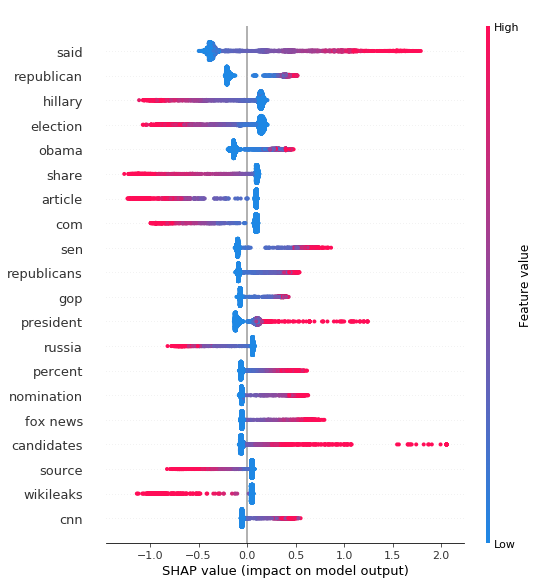

In [21]:
shap.summary_plot(shap_values, train_data)

Let's check out one article's full content. It was something about Kim Dotcom and Hillary's emails and was false (as indicated by the 0 in the second column).

In [16]:
print(df_train.iloc[28][0])
print(df_train.iloc[28][1])




Internet security expert Kim Dotcom says that Hillary Clinton is in “serious trouble,” with new information set to leak that some speculate could be a Wikileaks release of Hillary Clinton’s 33,000 deleted emails.
“There’s unpublished material, yet to come out. Clinton is in serious trouble,” the Megaupload founder tweeted last night.
Kim Dotcom’s promise is worthy of attention given his long standing relationship with Wikileaks and Julian Assange. During an interview with Bloomberg in May 2015, Dotcom (real name Kim Schmitz) acknowledged, “I love to talk to them”.
He also predicted that Julian Assange would be Hillary’s worst nightmare in 2016 “because he has access to information,” a forecast that very much came true.

There's unpublished material, yet to come out. Clinton is in serious trouble.
— Kim Dotcom (@KimDotcom) November 1, 2016 

This is not the first time that the entrepreneur’s tweets have prompted speculation to swirl. Schmitz has hinted on a number of occasions that Wik

Here are the words that served to push the prediction downwards. "Hillary" was #1 (which is kind of suspect unless you think all news about Hillary is fake), followed by "wikileaks".

In [22]:
shap.force_plot(explainer.expected_value,shap_values[28,:], train_data.iloc[28,:])